In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from cycler import cycler
import yaml

In [2]:
#%% Plotting parameters

DPI_SAVE = 600
DPI_PLOT = 150
# typical one column figure width
cm=1/2.54

In [3]:
# load style

plt.style.use('./pv-textbook_inigo.mplstyle')

In [4]:
# load colors

with open('./colors.yaml') as f:
    content = f.read()
    print (content)

colors = {}
yaml_file = open("./colors.yaml", 'r')
yaml_content = yaml.safe_load(yaml_file)
for key, value in yaml_content.items():
    colors[key] = value

colorlist = [colors[key] for key in colors]
plt.rcParams['axes.prop_cycle'] = cycler(color=colorlist)

# Default colors for the book "Fundamentals of Solar Cells 
# and Photovoltaic Systems Engineering"

color1 : '#5FA1D8' #ligthblue
color2 : '#B31F20' #darkred
color3 : '#498F34' #green
color4 : '#EBD741' #darkyellow
color5 : '#F18B45' #orange
color6 : '#002060' #darkblue
color7 : '#55B99D' #turqoise
color8 : '#BDC554' #yellowgreen
color9 : '#4472C4' #blue
color10 : '#B9DEF3' #verylightblue
color11 : 'black'  #black
color12 : '#BDBDBD' #lightgray
color13 : '#696969' #gray
color14 : '#CD853F' #brown
color15 : '#FF7F50' #lightpink


In [5]:
h=6.63*10**(-34)   # [J·s] Planck constant
c =299792458       # [m/s] Light speed

In [6]:
am15_spectra=pd.read_excel('./data/astmg173.xls', sheet_name='SMARTS2')
am15g=(np.array(am15_spectra['Wvlgth nm']), np.array(am15_spectra['Global tilt W*m-2*nm-1']))
photons_am15g=(am15g[0], am15g[1]*am15g[0]*10**(-9)/(h*c))

/tmp/ipykernel_14325/1514035481.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1240/x


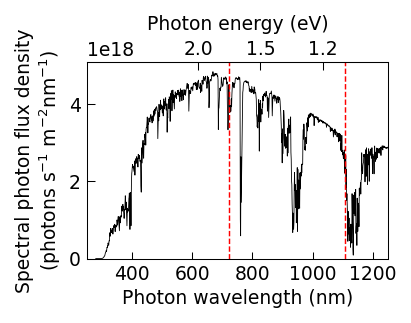

In [9]:
fig = plt.figure(figsize=(6.5*cm, 5*cm), dpi=DPI_PLOT)
ax = fig.add_subplot(111)

lw = 0.4

ax.plot(photons_am15g[0], photons_am15g[1], c='black', lw=lw)


y_text="""Spectral photon flux density
(photons s$^{-1}$ m$^{-2}$nm$^{-1}$)"""
ax.set_ylabel(y_text)
ax.set_ylim([0, None])
ax.set_xlabel("Photon wavelength (nm)")
ax.set_xlim([250, 1250])
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,3))
ax.axvline(1240/1.12, ls='--', lw=0.7, c='r')
ax.axvline(1240/1.72, ls='--', lw=0.7, c='r')

def nm2eV(x):
    return 1240/x

def eV2nm(x):
    return nm2eV(x)

secax = ax.secondary_xaxis('top', functions=(nm2eV, eV2nm))

secax.set_xticks(np.array([1.2, 1.5, 2]))
secax.set_xlabel('Photon energy (eV)', labelpad=5)
secax.tick_params('x', pad=1.5)

plt.tight_layout(pad=0.05)

#plt.savefig ('./Problem 6.7.png', dpi=DPI_SAVE)